# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [111]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [112]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [113]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [154, 75, 95]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,622,55,137,75,7,8
1,20398,1137,3,4407,3,975
2,3,2920,6252,440,223,709


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**  
No.0 might be a shop specialized  in meat/fish because most of its cost is from Fresh category. Comparing to the mean of the dataset, this shop's purchase amount is very small. Maybe it is a private management.  
No.1 might be a restaurant because its most of purchase cost is from food and looks using ingredients to cook in short time. Especaillay its cost from fresh is bigger than mean value. Maybe it is specialized in fresh foods such as meat or fish.  
No.2 might be a corner shop because its cost from all categrories except for fresh. Purchase cost in every category are not so big, so it is not big market.  

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [114]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = pd.read_csv("customers.csv")
#new_data.drop(['Region', 'Channel','Grocery', 'Delicatessen'], axis = 1, inplace = True)
new_data.drop(['Region', 'Channel',], axis = 1, inplace = True)
print "Wholesale customers dataset has {} samples with {} features each.".format(*new_data.shape)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(new_data.loc[:, ['Milk', 'Frozen', 'Detergents_Paper','Delicatessen', 'Fresh']], new_data['Grocery'], test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "decision tree regressor score: {}".format(score)

Wholesale customers dataset has 440 samples with 6 features each.
decision tree regressor score: 0.682578012876


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**  
I attempted to predict 'Grocery'. The score is 0.682578012876.
From this result, 'Grocery' feature can be explained with other features.
This feature is not necessary for identifying customers' spending habits. 
Because other features in dataset would be used for analysing customer instead of Grocery.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

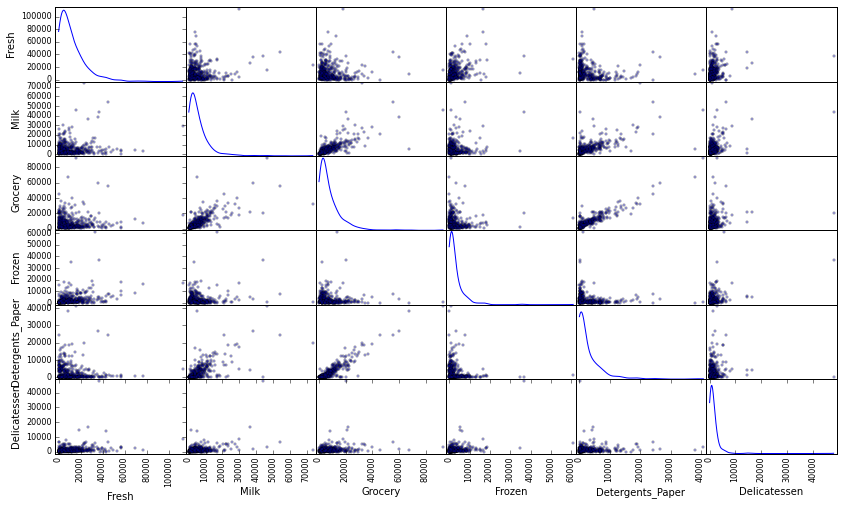

In [115]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**  
Pairs of 'Grocery' and 'Detergents_Paper', 'Grocery' and 'Milk' exhibit some degree of correlation.  'Fresh' doesn't exhibit any degree of correation with other features.  
This result confirm my supisous about 'Grocery' might be able to explain by other features. 'Grorcery' can be explained 'Detergents_Paper' or 'Milk'.  
Scatter diagram between 'Grocery' and 'Detergents_Paper' are distributed linearly. It shows strong correlation between them.  
'Fresh' with other features' scatter diagram show　dots gathering near origine.  

Distributions are not normally distributed. Some plots are gathering near origin point(i.e. Grocery v.s. Frozen) or one side axis(i.e Detergents_Paper v.s. Milk).
Looks those distributions are skewness beacause of too big axis scale. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

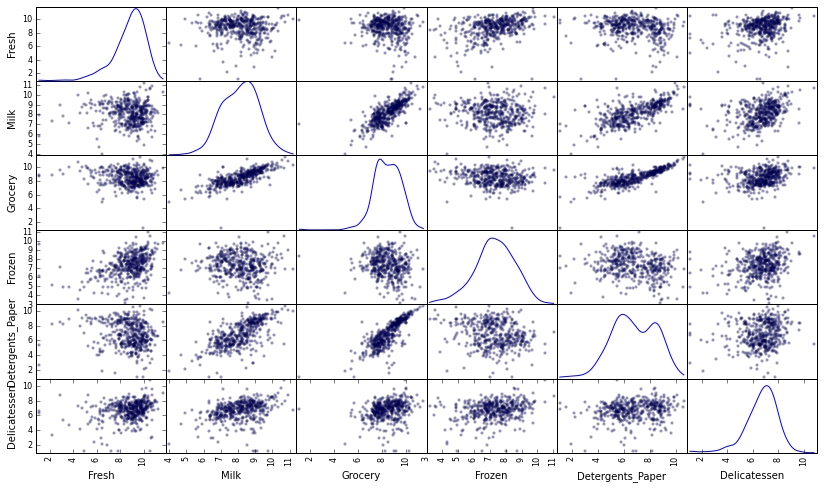

In [116]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [117]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
1,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
2,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [118]:
from collections import Counter
cnt = Counter()
cnt["abc"] +=1
cnt["abc"] +=1
print cnt

Counter({'abc': 2})


In [119]:
dict = {"Fresh":0}
cnt = Counter()
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 50)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    #Get outliners on dictionary object
    dict.update({feature: log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index})

    
print "Number of data which has outliners in all features"
print (dict['Fresh'] & dict['Milk'] & dict['Grocery'] & dict['Frozen'] & dict['Detergents_Paper'] & dict['Delicatessen'])

print "Number of data which has outliners at least one features"
print len(dict['Fresh'] | dict['Milk'] | dict['Grocery'] | dict['Frozen'] | dict['Detergents_Paper'] | dict['Delicatessen'])

# OPTIONAL: Select the indices for data points you wish to remove
#outliers  = (dict['Fresh'] | dict['Milk'] | dict['Grocery'] | dict['Frozen'] | dict['Detergents_Paper'] | dict['Delicatessen'])
outliers = []

print 'Number of outliner on Fresh and Milk'
print len(dict['Fresh'] & dict['Milk'] )

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


# print outliner on multiple features
cnt = Counter()
num_outliner_mutiple_feature = 0
for feature in log_data.keys():
    for num in map(str, dict[feature]):
        cnt[num] += 1
        
print 'Datapoints and counteron mutiple'
for k, v in cnt.items():
    if v >1 :
        print k
        num_outliner_mutiple_feature += 1
print 'Number of datapoint on multiple feature'
print num_outliner_mutiple_feature



Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
16,6.927558,9.084324,9.402695,4.897840,8.413609,6.984716
31,7.867871,8.375399,8.049746,7.643962,6.709304,6.892642
34,7.314553,7.590347,7.724005,6.052089,6.180017,5.978886
35,6.533789,8.610866,9.313889,6.725034,8.352083,6.077642
39,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968
43,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
53,6.196444,9.256556,9.352881,6.612041,8.632484,5.411646
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
68,7.802209,8.890135,8.292298,8.677610,6.669498,8.037543


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
11,9.483873,7.024649,8.416931,7.258412,6.308098,6.208590
15,9.235326,7.015712,8.248267,5.983936,6.871091,6.021023
21,8.624612,6.769642,7.605890,8.126518,5.926926,6.343880
23,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
26,9.200088,6.867974,7.958926,8.055475,5.488938,6.725034
27,9.566335,6.688355,8.021256,6.184149,4.605170,6.249975
28,8.321908,9.927399,10.164197,7.054450,9.059982,8.557567
39,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968
45,8.552753,10.000796,9.977249,7.461640,8.902864,8.514189


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
39,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968
47,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
61,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
69,9.030256,7.944492,7.164720,6.658011,6.486161,4.969813
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
85,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
97,5.998937,5.537334,6.413459,6.651572,3.988984,4.143135
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
12,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
14,10.112654,9.155356,9.400217,5.683580,8.528726,7.681560
15,9.235326,7.015712,8.248267,5.983936,6.871091,6.021023
16,6.927558,9.084324,9.402695,4.897840,8.413609,6.984716
25,9.690604,8.349957,8.935245,5.303305,8.294799,4.043051
32,9.981929,7.183871,7.967627,5.583496,6.822197,6.003887
34,7.314553,7.590347,7.724005,6.052089,6.180017,5.978886
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
90,9.341807,6.390241,7.401231,8.115820,4.234107,5.886104
93,9.333796,8.035926,7.631432,10.463360,4.262680,7.900266
97,5.998937,5.537334,6.413459,6.651572,3.988984,4.143135
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
131,7.650169,6.378426,5.749393,5.846439,4.248495,5.736572
134,8.907612,7.540090,7.684324,6.579251,3.850148,6.285998
141,10.321507,9.491904,8.554296,5.771441,3.931826,7.279319
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
23,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
24,10.027783,9.187686,9.531844,7.977625,8.407825,8.661813
25,9.690604,8.349957,8.935245,5.303305,8.294799,4.043051
28,8.321908,9.927399,10.164197,7.054450,9.059982,8.557567
40,10.086850,8.373785,8.467372,9.160099,7.043160,8.676587
42,9.291920,8.929965,9.613202,5.236442,8.839132,3.828641
43,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
44,9.176784,8.857515,9.256365,6.293419,8.437717,4.174387


Number of data which has outliners in all features
Int64Index([131, 154], dtype='int64')
Number of data which has outliners at least one features
283
Number of outliner on Fresh and Milk
24
Datapoints and counteron mutiple
216
211
218
219
133
131
135
25
169
23
28
289
345
340
342
343
285
286
263
122
125
264
128
269
224
51
53
379
378
412
299
295
313
312
144
390
275
395
277
81
85
251
141
94
369
367
364
363
361
308
309
302
303
305
380
108
109
384
103
106
39
418
247
34
383
88
439
432
339
338
333
60
61
65
66
69
175
174
172
171
170
288
185
405
182
183
181
186
187
184
403
189
399
221
191
400
142
402
98
168
228
90
93
167
161
97
96
270
220
15
16
143
388
92
155
154
159
238
235
236
237
233
375
398
47
45
42
43
322
327
325
203
204
207
206
148
75
71
78
261
357
356
355
353
352
359
Number of datapoint on multiple feature
146


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**  
For example, there are 24 data considered outliners for 'Fresh' and 'Milk'.  
I think such data should not be removed from the dataset.
Beacause if there were many features to consider, more than half of dataset would be removed.
Actually 64% data (283/440) are considered outliner for at least one feature.
And 33% data(146/440) are considered outliner for at least two features.
If we remove the data considered outliner, we should check the data background.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

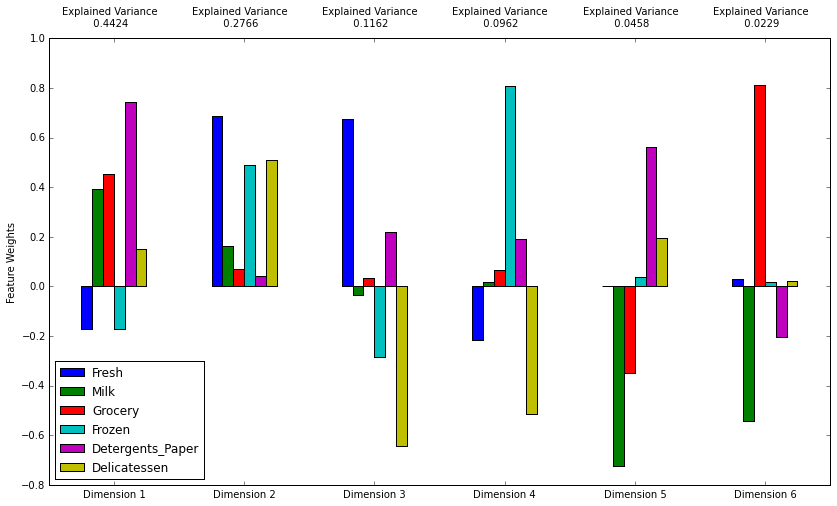

In [120]:
from sklearn.decomposition import PCA

#TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.keys()))
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**  
1st and 2nd pricipal components explain about 71% of variance intotal.
First four pricipal components explain about 93%.

I think each four pricipal components(PCs) represents following features in term.

1st PC: Big positive weights on Milk, Grocery and Detergents_Paper. And small negative on Fresh and Frozen. 
This feature represents that customers purchase foods at home and daily necessities toether  as household staples.

2nd PC: Big positive weight on Fresh, Frozen and Delicatessen. And other are small positive.
This feature represents that customers purchases foods to cook by theirself like restaurant. Since fresh, frozen, delicassen are necessary for such customers.

3rd PC: Big postive weight on Fresh and small Detergents_Paper, and big negative weight on Delicatessen and small Frozen. 
This represents that there are 2 type of customers. One is purchacing Fresh and Detergents_paper together. And Delicatessen and Frozen together. 
Former type is people buying fresh ingredient to cook. Later type is people buying cooked foods. 

4th PC: Big postive weight on Frozen and small Detergents_Paper. And big negative on Delicattesen and small Fresh.
This represents that there are 2 type of customers that purchases frozen product or fresh. delicasseten. I guess former is people who want to use the product in short time and later is people who want to use ingrediant in long time such as shipping.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [121]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-6.6033,-6.4820,1.2247,-0.7814,0.4625,0.1238
1,-8.3665,0.5353,-1.0888,-1.0634,0.2159,-4.1768
2,0.5721,-5.9329,-5.0156,0.4633,-0.8491,0.3529


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [122]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [123]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-6.6033,-6.4820
1,-8.3665,0.5353
2,0.5721,-5.9329


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**  
K Means is a simple algorithm to underst and generally it is short time to get result.
Gaussian Mixture Model(GMM) is that it's the fastest algorithm for learning mixture models. 
K Means is one of GMM that assuming all segments are equal covariance. So up to the tuning parameter, GMM can be faster then K means.  
K Means is hard clustering, it assigns each point to one cluster. But GMM is soft clutering that it calculate probability for each points for each clusters. 

I think GMM is better for this dataset. This customer dataset is a mixtured model from some customers types, and GMM is faster and soft clutering is more flexible than K Means.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the 
data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [124]:
# from sklearn.cluster import KMeans
from sklearn.mixture import GMM

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GMM(n_components=3)
# clusterer = KMeans(3)

clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_
# centers = clusterer.cluster_centers_ 

# TODO: Predict the cluster for each transformed sample data point
# sample_preds = clusterer.predict(pca.transform(pca_samples))
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data,preds)

print 'silhouette_score: '
print score

silhouette_score: 
0.375222595239


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**  
3 clusters has the best score 0.375 in several result as belows.  

n_components: score  
2: 0.316017379116  
3: 0.375222595239  
4: 0.333662047955  
5:0.250422782045  
6:0.267960355817  
7:0.315476409093  
8:0.297126020938  


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

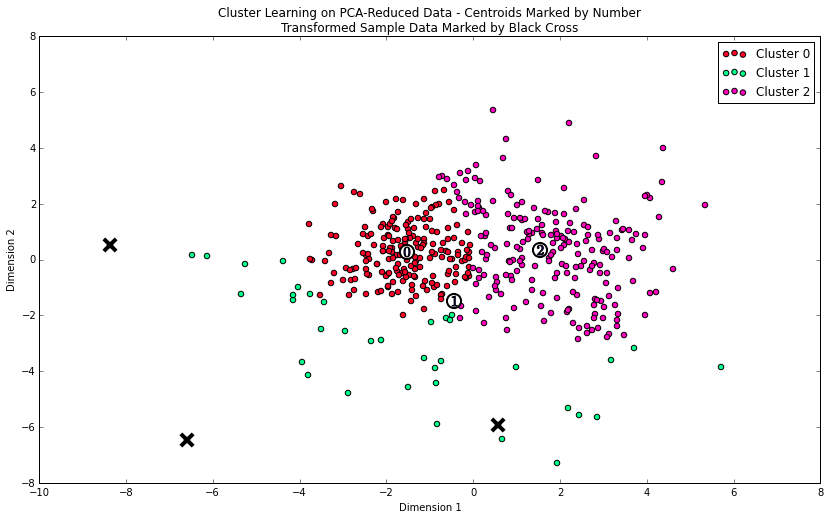

In [125]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9809,1924,2354.0,2216,286.0,721.0
Segment 1,2414,2226,3429.0,775,601.0,345.0
Segment 2,6047,6541,9557.0,1353,2830.0,1184.0
50%,8504,3627,4755.5,1526,816.5,965.5


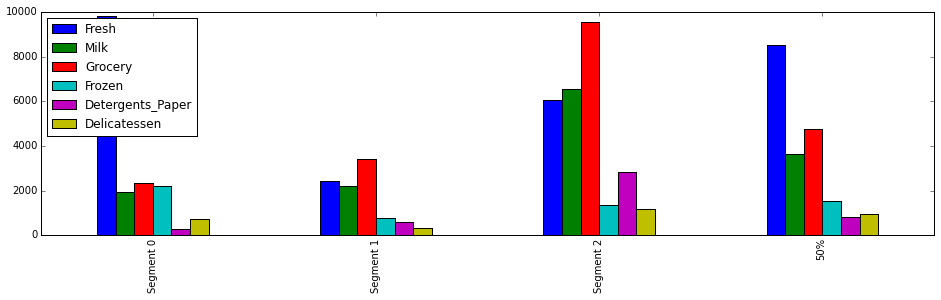

In [126]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))
display(true_centers)

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**  
Following is my suggestion of what set of establishments could each of the customer segments represents.

Segment 0: They are supermakets. Comparing to median value, their purchase cost are high in overall, especailay milk, grocery, detergents_papers are purchased. 

Segment 1: They are restaurant. Comparing to median, their purchase cost of fersh and frozen are high and detergents_paper is small. I think they are buyting foods for cooking. 

Segment 2: They are corner shops. Total costs are small comparing to median. It sells products in variant categories. Especially their purchase cost of grocery and detergents_paper are big. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [127]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**  
I guess segments for each sample point as following. 
Sample point 0: should be cluster 1 as shop specialized in fresh.  
Sample point 1: should be cluster 1 as a restaurant.  
Sample point 2: should be cluster 2 as a corner shop.
  
But all sample points are categorized on Cluster 0 in prediction.  
As shown in the diagram, each sample data are located at the farest place from the center of each clusters.
I think their feature's characteristic are not represented by learner because their most of  purchase cost on each category are smaller than average.  

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**  
Now we found 3 segments of customers by applying GMM algorithm.
First choose 10 customers from each segments as a test group.
Then change the delivery service from 5 days a week to 3 days a week on test group.
A month later, compare the ratio of purchase amount(This month purchase amount / Last month purchase amount) on test and non test group in each segment.
Maybe some test groups get better ratio than non tested group. Check which segment of customer get better ratio.
Then we will know which customer segments to change service.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**  
Apply the PCA algorithm on customer data.  
Then It finds new features as principle components which are combination of input features.
In the case that purchasing information available are many features, we can know which feature are useful or not for analysis.
And it can reduce dimensions of input feature by using principle components as input for supervised learning.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

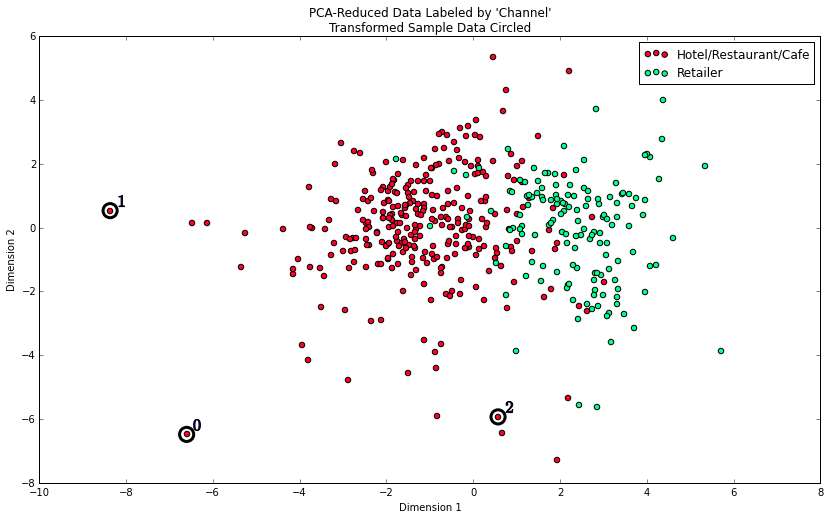

In [128]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**  
The clustering results based on 'Channel' data shows 2 clusters on right and left side in diagram.  
But around origin point(0, 0), points of 2 labes are mixed and difficult to see boundary of them.
I have guessed that right side segment(segment 2) are corner shops and left side points(segment 1) are restaurant.
So it is almost consistent with my previous definition.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.